In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [3]:
start_date = datetime(2022,5,8)
end_date = datetime(2023,4,8)
df = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-09,154.929993,155.830002,151.490005,152.059998,151.157410,131577900
2022-05-10,155.520004,156.740005,152.929993,154.509995,153.592850,115366700
2022-05-11,153.500000,155.449997,145.809998,146.500000,145.630417,142689800
2022-05-12,142.770004,146.199997,138.800003,142.559998,141.713791,182602000
2022-05-13,144.589996,148.100006,143.110001,147.110001,146.236786,113990900


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.672226,68749800
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.940475,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.401230,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.533798,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.432556,45390100


In [5]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-09,154.929993,155.830002,151.490005,152.059998,131577900
2022-05-10,155.520004,156.740005,152.929993,154.509995,115366700
2022-05-11,153.500000,155.449997,145.809998,146.500000,142689800
2022-05-12,142.770004,146.199997,138.800003,142.559998,182602000
2022-05-13,144.589996,148.100006,143.110001,147.110001,113990900


In [6]:
df.reset_index(inplace=True)
df.drop(columns=['Date'])

,Open,High,Low,Close,Volume
0,154.929993,155.830002,151.490005,152.059998,131577900
1,155.520004,156.740005,152.929993,154.509995,115366700
2,153.500000,155.449997,145.809998,146.500000,142689800
3,142.770004,146.199997,138.800003,142.559998,182602000
4,144.589996,148.100006,143.110001,147.110001,113990900
...,...,...,...,...,...
225,162.440002,165.000000,161.910004,164.899994,68749800
226,164.270004,166.289993,164.220001,166.169998,56976200
227,166.600006,166.839996,165.110001,165.630005,46278300
228,164.740005,165.050003,161.800003,163.759995,51511700


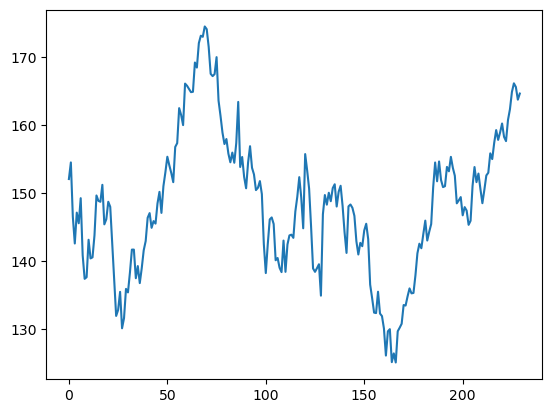

In [7]:
plt.plot(df.Close)

In [8]:
df

,Date,Open,High,Low,Close,Volume
0,2022-05-09,154.929993,155.830002,151.490005,152.059998,131577900
1,2022-05-10,155.520004,156.740005,152.929993,154.509995,115366700
2,2022-05-11,153.500000,155.449997,145.809998,146.500000,142689800
3,2022-05-12,142.770004,146.199997,138.800003,142.559998,182602000
4,2022-05-13,144.589996,148.100006,143.110001,147.110001,113990900
...,...,...,...,...,...,...
225,2023-03-31,162.440002,165.000000,161.910004,164.899994,68749800
226,2023-04-03,164.270004,166.289993,164.220001,166.169998,56976200
227,2023-04-04,166.600006,166.839996,165.110001,165.630005,46278300
228,2023-04-05,164.740005,165.050003,161.800003,163.759995,51511700


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
225    145.333499
226    145.605999
227    145.867299
228    146.156199
229    146.334099
Name: Close, Length: 230, dtype: float64

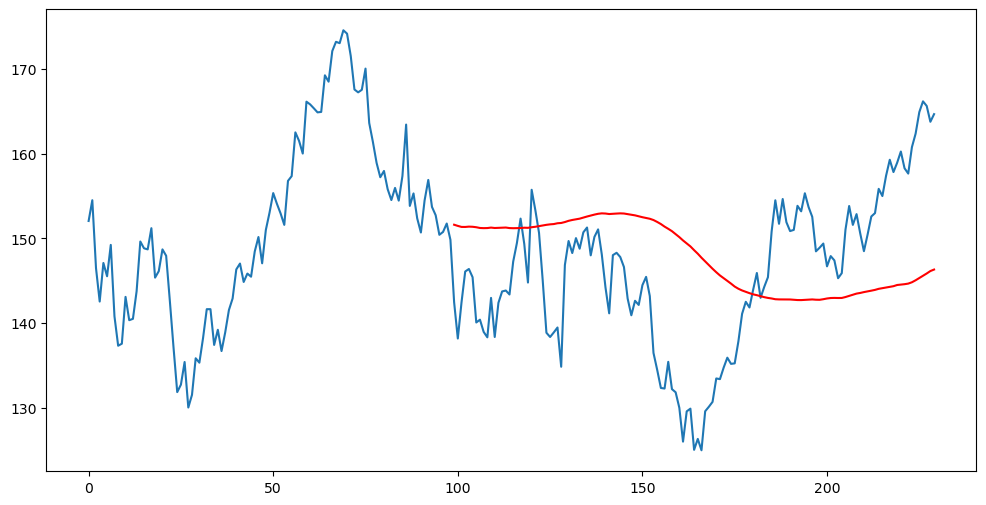

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
225    148.498249
226    148.651950
227    148.829800
228    148.990800
229    149.134750
Name: Close, Length: 230, dtype: float64

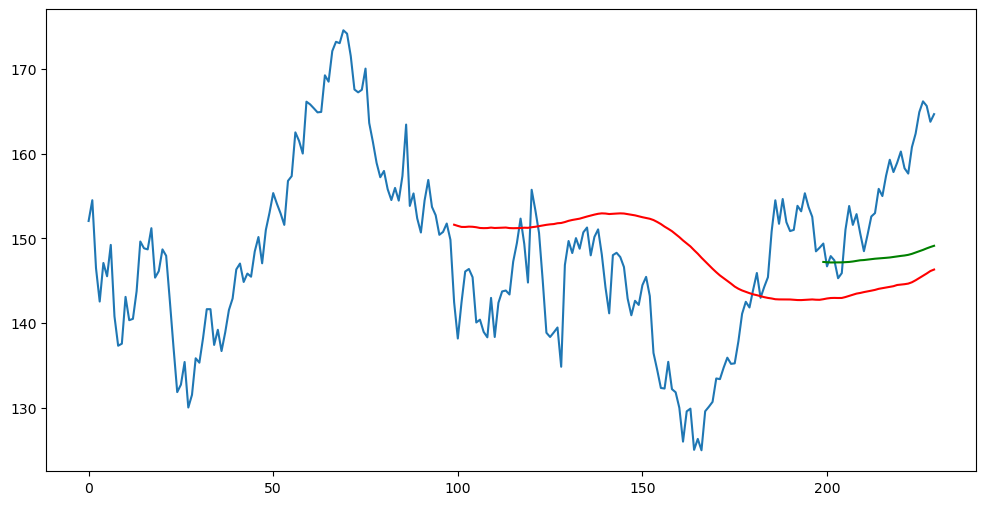

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df. shape

(230, 6)

In [14]:
#splitting  Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(161, 1)
(69, 1)


In [15]:
data_training.head()

,Close
0,152.059998
1,154.509995
2,146.500000
3,142.559998
4,147.110001


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[4.94833708e-01],
       [5.49865080e-01],
       [3.69946084e-01],
       [2.81446486e-01],
       [3.83647803e-01],
       [3.48382593e-01],
       [4.31491574e-01],
       [2.42363152e-01],
       [1.64420634e-01],
       [1.69811250e-01],
       [2.93800552e-01],
       [2.32030567e-01],
       [2.35624539e-01],
       [3.08849925e-01],
       [4.40476162e-01],
       [4.22506643e-01],
       [4.19586841e-01],
       [4.75741372e-01],
       [3.44788963e-01],
       [3.61859817e-01],
       [4.19586841e-01],
       [4.02740481e-01],
       [2.83243473e-01],
       [1.59479008e-01],
       [4.15544907e-02],
       [6.13206529e-02],
       [1.21293652e-01],
       [6.73826964e-04],
       [3.43665461e-02],
       [1.31176904e-01],
       [1.19497008e-01],
       [1.85085461e-01],
       [2.61230992e-01],
       [2.61230992e-01],
       [1.66442115e-01],
       [2.06648609e-01],
       [1.50269582e-01],
       [1.99909996e-01],
       [2.58984674e-01],
       [2.89532753e-01],


In [18]:
data_training_array.shape

(161, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(61, 100, 1)

In [21]:
#ML Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [23]:
model = tf.keras.Sequential()
model.add(LSTM(units=50, activation = 'relu' ,return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.1))

model = Sequential()
model.add(LSTM(units=60, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units=80, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [24]:
input_shape = (None,x_train.shape[1], 1)
model.build(input_shape)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 2)                 242       
                                                                 
Total params: 58802 (229.70 KB)
Trainable params: 58802 (229.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 4s 108ms/step - loss: 0.1171
Epoch 2/50
2/2 [==============================] - 0s 91ms/step - loss: 0.1048
Epoch 3/50
2/2 [==============================] - 0s 95ms/step - loss: 0.0887
Epoch 4/50
2/2 [==============================] - 0s 81ms/step - loss: 0.0801
Epoch 5/50
2/2 [==============================] - 0s 87ms/step - loss: 0.0725
Epoch 6/50
2/2 [==============================] - 0s 86ms/step - loss: 0.0599
Epoch 7/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0526
Epoch 8/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0396
Epoch 9/50
2/2 [==============================] - 0s 72ms/step - loss: 0.0288
Epoch 10/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0286
Epoch 11/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0280
Epoch 12/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0263
Epoch 13/50
2/2 [==============================] - 0s 59ms/s

In [27]:
model.save('keras model.h5')

c:\Users\rishm\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

,Close
161,126.040001
162,129.610001
163,129.929993
164,125.070000
165,126.360001


In [29]:
data_training.tail(100)

,Close
61,165.350006
62,164.869995
63,164.919998
64,169.240005
65,168.490005
...,...
156,132.300003
157,135.449997
158,132.229996
159,131.860001


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [32]:
final_df.head()

,Close
0,165.350006
1,164.869995
2,164.919998
3,169.240005
4,168.490005


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.81425407],
       [0.80456276],
       [0.80557231],
       [0.89279231],
       [0.87764997],
       [0.9505351 ],
       [0.97254189],
       [0.96931145],
       [1.        ],
       [0.9919239 ],
       [0.93882499],
       [0.85907541],
       [0.85221065],
       [0.85826765],
       [0.9087421 ],
       [0.77932553],
       [0.73410062],
       [0.68423183],
       [0.65011105],
       [0.6650516 ],
       [0.62164339],
       [0.59580049],
       [0.62467204],
       [0.59438737],
       [0.6531394 ],
       [0.77548942],
       [0.58186949],
       [0.6115485 ],
       [0.55219049],
       [0.51847359],
       [0.59479094],
       [0.64365017],
       [0.57944682],
       [0.55966092],
       [0.51302226],
       [0.51988702],
       [0.53987471],
       [0.50111037],
       [0.35251356],
       [0.26610132],
       [0.3519079 ],
       [0.42560078],
       [0.43165747],
       [0.41207336],
       [0.30426   ],
       [0.31092266],
       [0.28184933],
       [0.268

In [34]:
input_data.shape

(169, 1)

In [35]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(69, 100, 1)
(69,)


In [37]:
#Making Predictions

y_predicted = model.predict(x_test)

3/3 [==============================] - 1s 22ms/step


In [38]:
y_predicted.shape

(69, 2)

In [39]:
y_test

array([0.02059366, 0.09267118, 0.09913175, 0.00100955, 0.02705439,
       0.        , 0.09287296, 0.10357352, 0.11528363, 0.17100763,
       0.16939241, 0.19664843, 0.22047253, 0.20573408, 0.20694541,
       0.25943866, 0.32485366, 0.35352311, 0.339996  , 0.38239466,
       0.42216825, 0.36301234, 0.38905702, 0.41207336, 0.52089657,
       0.59519482, 0.53926904, 0.59822317, 0.54310515, 0.52190582,
       0.52473237, 0.58207159, 0.56894804, 0.61195238, 0.57924503,
       0.55582481, 0.47365225, 0.48233402, 0.49222681, 0.43791656,
       0.46234602, 0.45204935, 0.40965068, 0.42176467, 0.52513626,
       0.58166771, 0.53664458, 0.56228538, 0.5162527 , 0.47405613,
       0.51383003, 0.55663227, 0.56470836, 0.62245115, 0.60528971,
       0.65374506, 0.69170195, 0.66242683, 0.68463541, 0.71128606,
       0.67151217, 0.65879251, 0.72178484, 0.75388652, 0.80516843,
       0.83080953, 0.81990719, 0.78215209, 0.80032307])

In [40]:
y_predicted

array([[0.2402556 , 0.22444673],
       [0.22811744, 0.2082654 ],
       [0.22194502, 0.20302002],
       [0.21725863, 0.19965187],
       [0.20786503, 0.18709299],
       [0.20131984, 0.17979254],
       [0.19428709, 0.17145343],
       [0.19365299, 0.1744686 ],
       [0.1941287 , 0.17799662],
       [0.1955965 , 0.1820145 ],
       [0.20035201, 0.19097704],
       [0.20470971, 0.19782107],
       [0.2102598 , 0.20592768],
       [0.2166313 , 0.21456687],
       [0.22128513, 0.2198004 ],
       [0.22529784, 0.22393964],
       [0.23173794, 0.23207097],
       [0.24092534, 0.2436531 ],
       [0.2502973 , 0.2551437 ],
       [0.25797835, 0.26317832],
       [0.2665285 , 0.2730716 ],
       [0.2757447 , 0.2841317 ],
       [0.28132808, 0.2883169 ],
       [0.28720465, 0.29388064],
       [0.29325673, 0.3002503 ],
       [0.30300397, 0.31374288],
       [0.31493428, 0.33039945],
       [0.32400852, 0.34004664],
       [0.334546  , 0.35256737],
       [0.3419995 , 0.35880768],
       [0.

In [41]:
scaler.scale_

array([0.02018978])

In [42]:
scale_factor = 1/0.02018978
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

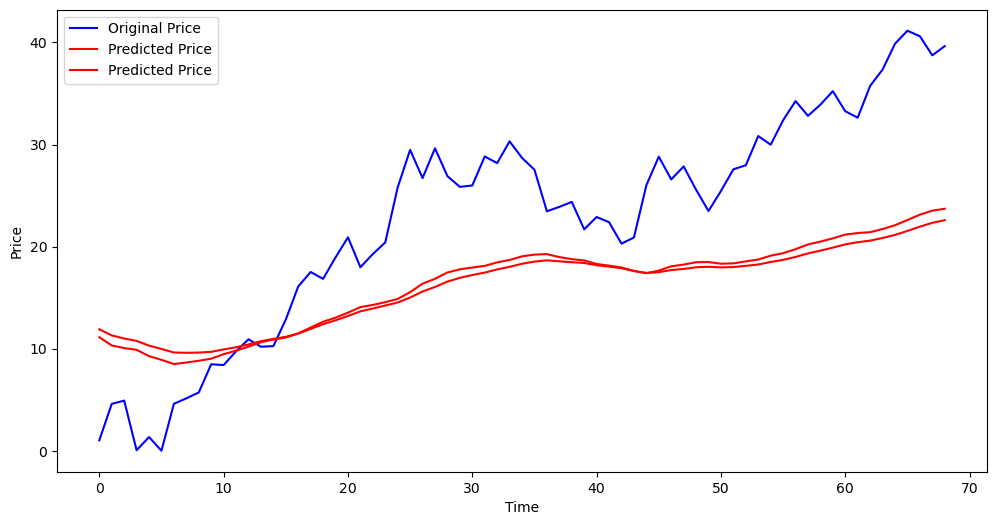

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()